In [ ]:
#objective: Predict the type of glass

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [38]:
#load data
df = pd.read_table('../datasets/glass.data', sep=",", header=None)
df.columns = ['id', 'ri', 'na', 'mg','al','si','k','ca','ba','fe','class']

In [3]:
#check data
df.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [39]:
#drop id
#df.drop('id', axis=1)
df = df[['ri', 'na', 'mg','al','si','k','ca','ba','fe','class']]

In [40]:
#check for missing data
cols_num = ['ri', 'na', 'mg','al','si','k','ca','ba','fe','class']
df[cols_num].isnull().sum()

ri       0
na       0
mg       0
al       0
si       0
k        0
ca       0
ba       0
fe       0
class    0
dtype: int64

In [12]:
#summary data
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [41]:
#scale data
scaler = preprocessing.StandardScaler()
to_scale_df = df[['ri', 'na', 'mg','al','si','k','ca','ba','fe']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['ri', 'na', 'mg','al','si','k','ca','ba','fe'])

In [42]:
#combine data
df_new = pd.concat([scaled_df ,df['class']], axis=1)

In [43]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(scaled_df, df['class'])
# display the relative importance of each attribute
print(model.feature_importances_)

[0.12440177 0.07717402 0.17790767 0.1425551  0.08224495 0.10128223
 0.16277335 0.07094117 0.06071974]


In [44]:
#split data into train and test
X = df_new.drop('class', axis=1)
y = df_new['class']
#y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

KNN: 0.552381 (0.283192)
CART: 0.457792 (0.189960)
SVM: 0.498052 (0.265796)
RF: 0.528788 (0.220359)
SGD: 0.255195 (0.207346)
GB: 0.574026 (0.208247)


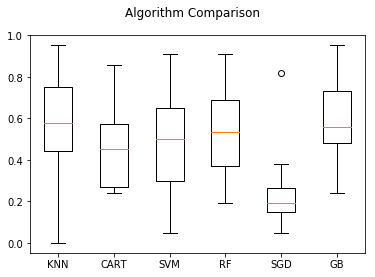

In [45]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:9]
Y = array[:,9]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
#test chosen model using test data
#model = KNeighborsClassifier()
#model.fit(X_train, y_train)
model = GradientBoostingClassifier(n_estimators=100,learning_rate=1,max_depth=3,random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7962962962962963

In [26]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["1", "2","3", "4","5", "6"],
    index=["1", "2","3", "4","5", "6"]
)

,1,2,3,4,5,6
1,22,1,0,0,0,0
2,2,11,2,1,0,0
3,5,0,2,0,0,0
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,6


In [31]:
#RFE
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True False False False]
[1 4 1 2 7 1 3 6 5]


In [32]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [33]:
df_new = df[['ri','mg' ,'k','class']]

In [34]:
#split data into train and test
X = df_new.drop('class', axis=1)
y = df_new['class']
#y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
model = GradientBoostingClassifier(n_estimators=100,learning_rate=1,max_depth=3,random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.6666666666666666

In [36]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["1", "2","3", "4","5", "6"],
    index=["1", "2","3", "4","5", "6"]
)

,1,2,3,4,5,6
1,18,1,4,0,0,0
2,3,10,0,1,0,2
3,5,2,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,6
